In [1]:
import numpy as np
import pandas as pd
from nltk import *
import tensorflow as tf
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
dftamil=pd.read_csv('https://raw.githubusercontent.com/DevanshJain07/Offensive-Language-Identification-in-Dravidian-Languages-EACL-2021/main/tamil_train.csv')
dfmal=pd.read_csv('https://raw.githubusercontent.com/DevanshJain07/Offensive-Language-Identification-in-Dravidian-Languages-EACL-2021/main/mal_train.csv')
dfkannada=pd.read_csv('https://raw.githubusercontent.com/DevanshJain07/Offensive-Language-Identification-in-Dravidian-Languages-EACL-2021/main/kannada_train.csv')
dftamiltest=pd.read_csv('https://raw.githubusercontent.com/DevanshJain07/Offensive-Language-Identification-in-Dravidian-Languages-EACL-2021/main/tamil_test.csv')
dfmaltest=pd.read_csv('https://raw.githubusercontent.com/DevanshJain07/Offensive-Language-Identification-in-Dravidian-Languages-EACL-2021/main/mal_test.csv')
dfkannadatest=pd.read_csv('https://raw.githubusercontent.com/DevanshJain07/Offensive-Language-Identification-in-Dravidian-Languages-EACL-2021/main/kannada_test.csv')

In [3]:
print(dftamil.shape)
print(dfkannada.shape)
print(dfmal.shape)
print(dftamiltest.shape)
print(dfkannadatest.shape)
print(dfmaltest.shape)

(35138, 2)
(6216, 2)
(16010, 2)
(4391, 9)
(777, 1)
(2000, 1)


###  Table Changes

In [4]:
dftamiltest=dftamiltest.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'], axis = 1)

In [5]:
dfmaltest['Fefka ee padam release cheyyan samadhicho? '][0]

'എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo videoorderil ചെയ്തപോലെ'

In [6]:
dft=pd.DataFrame({"movie vara level la Erika poguthu":["movie vara level la Erika poguthu"],
                 "Not_offensive":["Not_offensive"]})
dfk=pd.DataFrame({"Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira":["Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira"],
                 "Not_offensive":["Not_offensive"]})
dfttest=pd.DataFrame({"14.12.2018 epo trailer pathutu irken ... Semaya iruku":["14.12.2018 epo trailer pathutu irken ... Semaya iruku"]})
dfktest=pd.DataFrame({"Anna nim e vedio nodinu mathe chaina apps use madidre...nijakku avru maryade  swabhiman ildoru bharatha dalli irbardu ....antavrnella nimhange maryade thegibeku..... ":["Anna nim e vedio nodinu mathe chaina apps use madidre...nijakku avru maryade  swabhiman ildoru bharatha dalli irbardu ....antavrnella nimhange maryade thegibeku..... "]})
dfmtest=pd.DataFrame({"Fefka ee padam release cheyyan samadhicho? ":["Fefka ee padam release cheyyan samadhicho? "]})

In [7]:

datat = pd.concat([dft, dftamil], ignore_index=True)
datak = pd.concat([dfk, dfkannada], ignore_index=True)
datatt = pd.concat([dfttest, dftamiltest], ignore_index=True)
datakt = pd.concat([dfktest, dfkannadatest], ignore_index=True)
datamt = pd.concat([dfmtest, dfmaltest], ignore_index=True)

In [8]:
data_tamil=datat.rename(columns={"movie vara level la Erika poguthu": "text", "Not_offensive": "label"})
data_kannada=datak.rename(columns={"Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira": "text", "Not_offensive": "label"})
data_tamiltest=datatt.rename(columns={"14.12.2018 epo trailer pathutu irken ... Semaya iruku": "text"})
data_kannadatest=datakt.rename(columns={"Anna nim e vedio nodinu mathe chaina apps use madidre...nijakku avru maryade  swabhiman ildoru bharatha dalli irbardu ....antavrnella nimhange maryade thegibeku..... ": "text"})
data_maltest=datamt.rename(columns={"Fefka ee padam release cheyyan samadhicho? ": "text"})

In [9]:
print(data_tamil.shape)
print(data_kannada.shape)
print(dfmal.shape)
print(data_tamiltest.shape)
print(data_kannadatest.shape)
print(data_maltest.shape)

(35139, 2)
(6217, 2)
(16010, 2)
(4392, 1)
(778, 1)
(2001, 1)


### Concatenate

In [10]:
datafinal=pd.concat([data_tamil,data_kannada,dfmal])
datafinaltest=pd.concat([data_tamiltest,data_kannadatest,data_maltest])

In [11]:
datafinaltest

,text
0,14.12.2018 epo trailer pathutu irken ... Semay...
1,Paka thana poro movie la Enna irukunu
2,“U kena tunggu lebih lama lagi untuk tahu saya...
3,Suriya anna vera level anna mass
4,suma kaththaatha da sound over a pooda kudaath...
...,...
1996,Swargatthil ninnu purathaakkappetta daivatthin...
1997,Ivide Palakkad Jayettan Fans club nnu ashamsak...
1998,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും
1999,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...


In [12]:
df_train = datafinal.sample(frac=1).reset_index(drop=True) #shuffling
df_test = datafinaltest.sample(frac=1).reset_index(drop=True) #shuffling

In [13]:
df_test.shape

(7171, 1)

### Numerical value given to labels

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_train['Label']=labelencoder.fit_transform(df_train['label'])

In [15]:
df_train.head()

,text,label,Label
0,Super bro,not-Kannada,5
1,YUVAN BGM .... VERITHANAM OVERLOADED... Love y...,Not_offensive,0
2,Singam Sinletha Varum BAIRAVAA Baikkiramma V...,Not_offensive,0
3,Filim kaannadhe trailer kandu diss like adikka...,Not_offensive,0
4,ഡിഗ്രേയ്‌ഡ്‌ ഇവിടെ വേവില്ല.. ഒറ്റ കാരണമേ ഉള്ളു...,Not_offensive,0


In [16]:
df_train['Label'].value_counts()

Label
0    43122
4     3309
2     3069
1     3026
5     1522
6     1454
7     1287
3      577
Name: count, dtype: int64

# Pre-Processing

In [17]:
y=[]
y=df_train['Label'].values
y.shape

(57366,)

<Axes: xlabel='Label'>

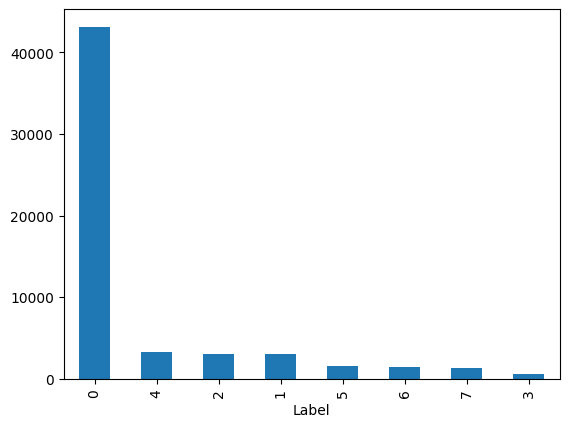

In [18]:
df_train['Label'].value_counts().plot(kind='bar')

In [19]:
df_train = df_train.apply(lambda x: x.astype(str).str.lower()) #Lower case
df_test = df_test.apply(lambda x: x.astype(str).str.lower()) #Lower case

In [20]:
df_train['text']=df_train['text'].str.replace('[^\s\w]','') #removing punctuations
df_test['text']=df_test['text'].str.replace('[^\s\w]','') #removing punctuations

In [21]:
df_train['text_token'] = df_train['text'].apply(lambda x: word_tokenize(x)) #sentence converted to words
df_test['text_token'] = df_test['text'].apply(lambda x: word_tokenize(x)) #sentence converted to words

In [22]:
ps = PorterStemmer()
df_train['text'] = df_train['text_token'].apply(lambda x: list(ps.stem(i) for i in x)) #Stemming
df_test['text'] = df_test['text_token'].apply(lambda x: list(ps.stem(i) for i in x)) #Stemming

In [23]:
stops = set(stopwords.words("english"))

df_train['text'] = df_train['text'].apply(lambda x: ' '.join(list(i for i in x if i not in stops))) #removind all the stopwords
df_test['text'] = df_test['text'].apply(lambda x: ' '.join(list(i for i in x if i not in stops))) #removind all the stopwords

In [24]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df_train['text'] =df_train['text'].apply(lambda x: lemmatizer.lemmatize(x))
df_test['text'] =df_test['text'].apply(lambda x: lemmatizer.lemmatize(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [25]:
df_train.head()

,text,label,Label,text_token
0,super bro,not-kannada,5,"[super, bro]"
1,yuvan bgm .... verithanam overload ... love th...,not_offensive,0,"[yuvan, bgm, ...., verithanam, overloaded, ......"
2,singam sinletha varum bairavaa baikkiramma varum,not_offensive,0,"[singam, sinletha, varum, bairavaa, baikkiramm..."
3,filim kaannadh trailer kandu diss like adikkan...,not_offensive,0,"[filim, kaannadhe, trailer, kandu, diss, like,..."
4,ഡിഗ്രേയ്‌ഡ്‌ ഇവിടെ വേവില്ല .. ഒറ്റ കാരണമേ ഉള്ള...,not_offensive,0,"[ഡിഗ്രേയ്‌ഡ്‌, ഇവിടെ, വേവില്ല, .., ഒറ്റ, കാരണമ..."


In [26]:
df_test.head()

,text,text_token
0,arjun dheol good,"[arjun, and, dheol, are, good]"
1,இந்த ட்ரெய்லர் பலருக்கு புரியாமல் இருக்கலாம் அ...,"[இந்த, ட்ரெய்லர், பலருக்கு, புரியாமல், இருக்கல..."
2,ye jaylalita ka naam kharab karegi,"[ye, to, jaylalita, ka, naam, kharab, karegi]"
3,ipadiyum irukkunu katta muyarchi seiyyum direc...,"[ipadiyum, irukkunu, katta, muyarchi, seiyyum,..."
4,0:43 rock ... suriya anna u1 selva g,"[after, 0:43, rocked, ..., suriya, anna, u1, s..."


In [27]:
y=df_train['text'].values
z=df_test['text'].values

In [28]:
def tokenize(c_train,c_test):
    tweet_tokenizer = TweetTokenizer()
    vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
    Xy_train = vectorizer.fit_transform(c_train).toarray()
    Xz_test = vectorizer.fit_transform(c_test).toarray()
    return Xy_train,Xz_test

In [29]:
Xy_train,Xz_test = tokenize(y,z)
Xy_train.shape,Xz_test.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((57366, 1010), (7171, 1010))

In [30]:
df_test['text']

0                                        arjun dheol good
1       இந்த ட்ரெய்லர் பலருக்கு புரியாமல் இருக்கலாம் அ...
2                      ye jaylalita ka naam kharab karegi
3       ipadiyum irukkunu katta muyarchi seiyyum direc...
4                    0:43 rock ... suriya anna u1 selva g
                              ...                        
7166                trailer kandal ariyam super hit aakum
7167    silurkkuthu udambula innum padam yepti irukka ...
7168    rajuvettanod pand veliya thalpariyamillayirunn...
7169    thirakk koranjittu padathinu pokam ennanu vich...
7170                     ತೊಗರಿ ತಿಪ್ಪ ಒಂದು ಓಳ್ಳೇ ಕಥೆ ಕಣ್ರೀ
Name: text, Length: 7171, dtype: object

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model.fit(Xy_train, df_train['Label'])


LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [33]:
# tweet_tokenizer = TweetTokenizer()
# vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1010)
# df_test['text'] = vectorizer.fit_transform(df_test['text']).toarray()
y_pred = model.predict(Xz_test)

In [34]:
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)